## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
'''
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet
'''

     |████████████████████████████████| 10.1MB 2.8MB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.24.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.24.0 which is incompatible.
     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 26.6MB 1.7MB/s 
ERROR: tensorflow 2.2.0rc2 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [25]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.3
Usando seaborn 0.10.0
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução

movies_url = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv'
filmes = pd.read_csv(movies_url)

filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.shape[0] == len(filmes['filmeId'].unique())
filmes.set_index('filmeId', inplace= True)

In [3]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [5]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução

ratings_url = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv'
notas = pd.read_csv(ratings_url)
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [7]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução

# criando o dataframe com as notas medias inclusas
nota_media = pd.Series(notas.groupby(by= 'filmeId')['nota'].mean(), name= 'nota_media')
filmes = pd.concat([filmes, nota_media], axis= 1)

# conferindo se há filmes sem uma nota media atribuída
filmes.loc[filmes['nota_media'].isnull() == True]

# temos 18 filmes no grupo dos filmes sem notas atribuídas
len(filmes.index) - len(notas['filmeId'].unique())

18

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [0]:
# solução para calcular o total de votos por filme

# criando uma serie com o número de notas de cada filme
total_de_votos = pd.Series(notas.groupby(by= 'filmeId')['nota'].count(), name= 'total_de_votos')

In [12]:
# solução para criar a nova coluna e filtrar os filmes

# criando o dataframe com a contagem de notas inclusas
filmes = pd.concat([filmes, total_de_votos], axis= 1)

# criando um filtro para o dataframe manter apenas os registros com 50 ou mais notas atribuídas
filtro_contagem = filmes['total_de_votos'] >= 50
filmes = filmes[filtro_contagem].sort_values(by= 'total_de_votos')

# checando que não há valores faltantes de nota media 
filmes['nota_media'].isnull().sum()

0

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
5010,Black Hawk Down (2001),Action|Drama|War,2001.0,3.81,50.0
116797,The Imitation Game (2014),Drama|Thriller|War,2014.0,4.02,50.0
910,Some Like It Hot (1959),Comedy|Crime,1959.0,4.01,50.0
34405,Serenity (2005),Action|Adventure|Sci-Fi,2005.0,3.94,50.0
34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller,2005.0,3.15,50.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

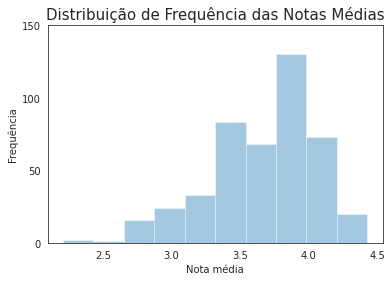

In [15]:
# solução histograma

sns.set_style('white')
notas_medias_hist = sns.distplot(filmes['nota_media'], kde= False, bins= 10)
plt.ylabel('Frequência')
plt.xlabel('Nota média')
plt.title('Distribuição de Frequência das Notas Médias', size= 15)
plt.yticks(range(0, 200, 50))
plt.show()

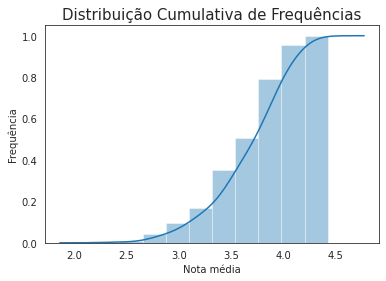

In [16]:
# solução cumulativa

sns.set_style('white')
notas_medias_acumulado = sns.distplot(filmes['nota_media'], hist_kws= {'cumulative': True}, bins= 10, kde_kws= {'cumulative': True})
plt.ylabel('Frequência')
plt.xlabel('Nota média')
plt.title('Distribuição Cumulativa de Frequências', size= 15)
plt.show()

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

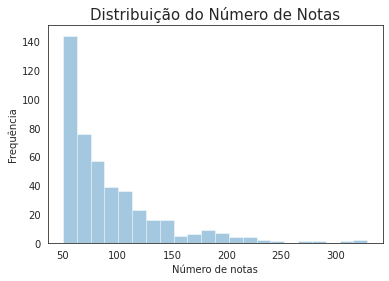

In [17]:
# solução histograma

sns.set_style('white')
total_votos_hist = sns.distplot(filmes['total_de_votos'], kde= False)
plt.ylabel('Frequência')
plt.xlabel('Número de notas')
plt.title('Distribuição do Número de Notas', size= 15)
plt.show()

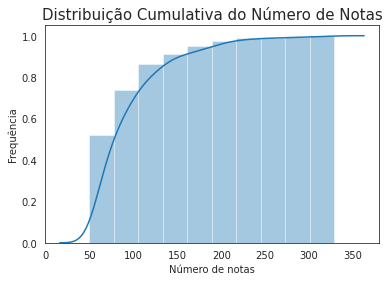

In [18]:
# solução cumulativa

sns.set_style('white')
total_votos_acumulado = sns.distplot(filmes['total_de_votos'], hist_kws= {'cumulative': True}, bins= 10, kde_kws= {'cumulative': True})
plt.ylabel('Frequência')
plt.xlabel('Número de notas')
plt.title('Distribuição Cumulativa do Número de Notas', size= 15)
plt.show()

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução

nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.2)

In [20]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [21]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [22]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
5010,Black Hawk Down (2001),2001.0,3.81,50.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
116797,The Imitation Game (2014),2014.0,4.02,50.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
910,Some Like It Hot (1959),1959.0,4.01,50.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34405,Serenity (2005),2005.0,3.94,50.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34048,War of the Worlds (2005),2005.0,3.15,50.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

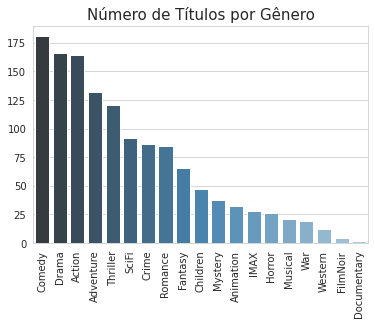

In [26]:
# solução

contagem_generos = generos.sum().sort_values(ascending= False)

sns.set_style('whitegrid')
pal = sns.color_palette('Blues_d', len(list(contagem_generos)))
rank = contagem_generos.argsort().argsort() # http://stackoverflow.com/a/6266510/1628638
sns.barplot(contagem_generos.index, contagem_generos, palette=np.array(pal[::-1])[rank])
plt.xticks(rotation= 90)
plt.title('Número de Títulos por Gênero', size= 15)
plt.show()

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução

top5_generos_em_quantidade_de_filmes =  generos.sum().sort_values(ascending= False).iloc[0:5]

In [28]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [29]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0
2,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0
4,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0


In [30]:
# solucão

votos_por_genero_por_filme.sum().sort_values(ascending= False)

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

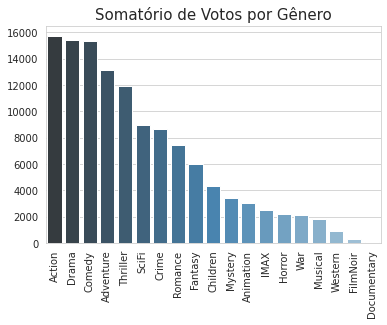

In [31]:
# solução

votos_genero_decr = votos_por_genero_por_filme.sum().sort_values(ascending= False)

sns.set_style('whitegrid')
pal = sns.color_palette('Blues_d', len(list(votos_genero_decr)))
rank = votos_genero_decr.argsort().argsort() # http://stackoverflow.com/a/6266510/1628638
sns.barplot(votos_genero_decr.index, votos_genero_decr, palette=np.array(pal[::-1])[rank])
plt.xticks(rotation= 90)
plt.title('Somatório de Votos por Gênero', size= 15)
plt.show()

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [32]:
# solucao código

df = pd.concat([votos_genero_decr, contagem_generos], axis= 1) #columns= ['total_votos', 'numero_filmes'])
df.columns = ['total_votos', 'numero_filmes']
df['votos/filme'] = df['total_votos'] / df['numero_filmes']

df = df.sort_values(by= 'votos/filme', ascending= False)
df['votos/filme']

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
Name: votos/filme, dtype: float64

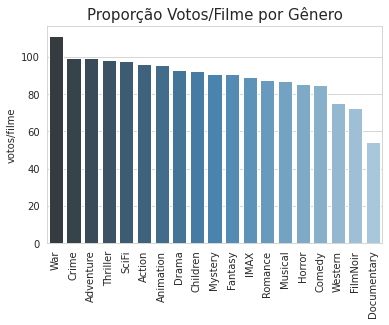

In [33]:
# solução com visualização 

votos_filme = df['votos/filme']

sns.set_style('whitegrid')
pal = sns.color_palette('Blues_d', len(list(votos_filme)))
rank = votos_filme.argsort().argsort() # http://stackoverflow.com/a/6266510/1628638
sns.barplot(votos_filme.index, votos_filme, palette=np.array(pal[::-1])[rank])
plt.xticks(rotation= 90)
plt.title('Proporção Votos/Filme por Gênero', size= 15)
plt.show()

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb606f7e588>, <matplotlib.lines.Line2D object at 0x7fb606f7e940>, <matplotlib.lines.Line2D object at 0x7fb606fdbfd0>, <matplotlib.lines.Line2D object at 0x7fb606fe53c8>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb606f7ecf8>, <matplotlib.lines.Line2D object at 0x7fb606fdb0f0>, <matplotlib.lines.Line2D object at 0x7fb606fe5780>, <matplotlib.lines.Line2D object at 0x7fb606fe5b38>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb606f7e2b0>, <matplotlib.lines.Line2D object at 0x7fb606fdbbe0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb606fdb4a8>, <matplotlib.lines.Line2D object at 0x7fb606fe5ef0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb606fdb860>, <matplotlib.lines.Line2D object at 0x7fb606fc52e8>], 'means': []}


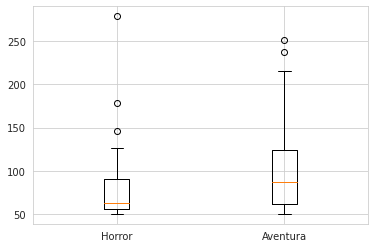

In [42]:
# solução:

df_horror = filmes.loc[filmes['Horror'] == 1]['total_de_votos']
df_aventura = filmes.loc[filmes['Adventure'] == 1]['total_de_votos']

boxplot = plt.boxplot(x= [df_horror, df_aventura], labels= ['Horror', 'Aventura'])


## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

In [0]:
# solucao histograma de aventura


In [0]:
# solucao histograma de horror


In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo



In [0]:
# solução com o teste desejado


### Solução (explique sua conclusão):



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [0]:
# solução:


## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

In [0]:
# solucao histograma de aventura


In [0]:
# solucao histograma de horror


In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo



In [0]:
# solução com o teste desejado


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [0]:
votos_por_genero

In [0]:
# solução: calculando os 2 generos mais votados


In [0]:
# solução: encontrando os top 5 filmes desses generos


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [0]:
# solucao


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [0]:
# solucao


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

In [0]:
# solucao


## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [0]:
# solução (código)


### Solução (explicação)



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

In [0]:
# solução


## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [0]:
# solução